In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

In [6]:
df = pd.read_csv('info_data_job_market_research.csv')

## Gráfica palabras usadas Puesto trabajo:

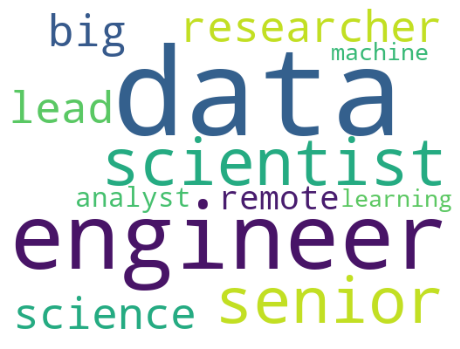

In [21]:
puesto_ds = df[df['Tipo puesto']=='Data Scientist']

puesto_ds = pd.Series(' '.join(puesto_ds['Puesto ofertado']).lower().split()).value_counts()[:30]


rem_word_puesto = ['-','and','&','de','in','for']

for i in rem_word_puesto:
    if i in puesto_ds:
        puesto_ds = puesto_ds.drop(i)


puesto_ds = puesto_ds[:12]

puesto_ds.rename('Suma', inplace=True)

df_puesto_ds = pd.DataFrame(puesto_ds)

df_puesto_ds.reset_index(inplace=True)

df_puesto_ds.rename(columns = {'index':'Palabras en DA'}, inplace=True)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df_puesto_ds['Palabras en DA']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph_puesto_ds.png')

plt.show()

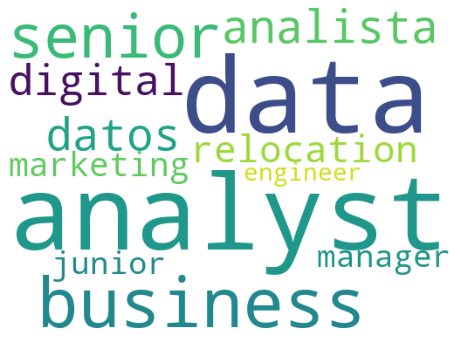

In [26]:
puesto_da = df[df['Tipo puesto']=='Data Analyst']

puesto_da = pd.Series(' '.join(puesto_da['Puesto ofertado']).lower().split()).value_counts()[:30]

 
rem_word_puesto_da = ['-', 'and', 'analyst,', 'de', ',', '&', '–', 'provided)', '/', 'it', '(bangkok', 'based,']

for i in rem_word_puesto_da:
    if i in puesto_da:
        puesto_da = puesto_da.drop(i)


puesto_da = puesto_da[:12]

puesto_da.rename('Suma', inplace=True)

df_puesto_da = pd.DataFrame(puesto_da)

df_puesto_da.reset_index(inplace=True)

df_puesto_da.rename(columns = {'index':'Palabras en DA'}, inplace=True)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df_puesto_da['Palabras en DA']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph_puesto_da.png')

plt.show()

## Gráficas de días activos

In [30]:
diasact_da = df[df['Tipo puesto']=='Data Analyst']

diasact_da = diasact_da['Días activos'].copy()

lista_dias = ['segundo', 'segundos', 'minuto', 'minutos', 'hora', 'horas', 'día', 'días']

for i in lista_dias:
    diasact_da[diasact_da.str.contains(i)] = '03-08-21'
    
diasact_da[diasact_da.str.contains(' 1 semana')] = '03-01-21'
diasact_da[diasact_da.str.contains(' 2 semanas')] = '02-22-21'
diasact_da[diasact_da.str.contains(' 3 semanas')] = '02-15-21'
diasact_da[diasact_da.str.contains(' 4 semanas')] = '02-08-21'
diasact_da[diasact_da.str.contains(' 1 mes')] = '02-01-21'
diasact_da[diasact_da.str.contains(' 2 meses')] = '01-25-21'
diasact_da[diasact_da.str.contains(' 3 meses')] = '01-18-21'
diasact_da[diasact_da.str.contains(' 4 meses')] = '01-11-21'
diasact_da[diasact_da.str.contains(' 5 meses')] = '01-04-21'

diasact_da = diasact_da.value_counts()

diasact_da.drop('no_data', inplace=True)

df_diasact_da = pd.DataFrame(diasact_da)

df_diasact_da.reset_index(inplace=True)

df_diasact_da.rename(columns={'index': 'Fechas'}, inplace = True)

df_diasact_da['Fechas'] = pd.to_datetime(df_diasact_da['Fechas'])

df_diasact_da.sort_values('Fechas', ascending=True, inplace=True)

fig = px.bar(df_diasact_da, x='Fechas', y='Días activos',
            labels={'x':'Palabras en DA', 'y':'Suma'})
fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()